In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


import seaborn as sb
sns.kdeplot(ratings_dataset['rating'])

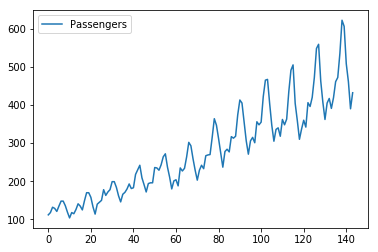

In [5]:
#data.plot()
plt.plot(data['#Passengers'],label='Passengers')
plt.legend()

In [6]:
data=data.set_index('Month')

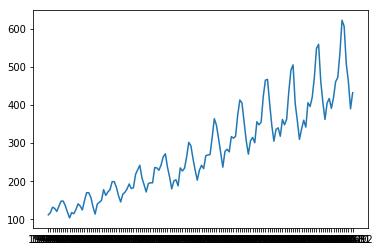

In [7]:
plt.plot(data['#Passengers'])

In [8]:
data.index = pd.to_datetime(data.index)

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


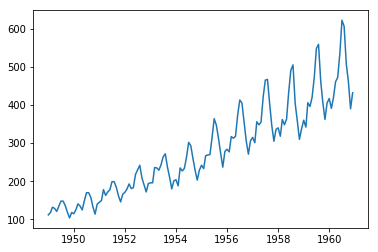

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['#Passengers'])

In [10]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
data.rolling

<bound method NDFrame._add_series_or_dataframe_operations.<locals>.rolling of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119
1949-11-01          104
1949-12-01          118
1950-01-01          115
1950-02-01          126
1950-03-01          141
1950-04-01          135
1950-05-01          125
1950-06-01          149
1950-07-01          170
1950-08-01          170
1950-09-01          158
1950-10-01          133
1950-11-01          114
1950-12-01          140
1951-01-01          145
1951-02-01          150
1951-03-01          178
1951-04-01          163
1951-05-01          172
1951-06-01          178
...                 ...
1958-07-01          491
1958-08-01          505
1958-09-01          404
1958-10-01          359
1958-11-01          310
1958-12-01

In [13]:
r_mean=data.rolling(2).mean()
r_mean.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,115.0
1949-03-01,125.0
1949-04-01,130.5
1949-05-01,125.0


In [14]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


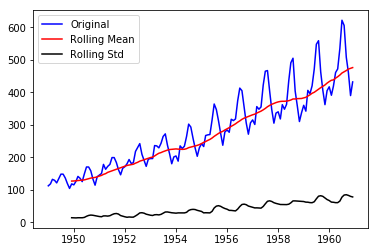

In [15]:
r_mean=data.rolling(12).mean()
r_std=data.rolling(12).std()
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(r_mean, color='red', label='Rolling Mean')
std = plt.plot(r_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
st=adfuller(data['#Passengers'].dropna())

In [18]:
st

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
def stationary_test(ts_data):
    r_mean=ts_data.rolling(12).mean()
    r_std=ts_data.rolling(12).std()
    orig = plt.plot(ts_data, color='blue',label='Original')
    mean = plt.plot(r_mean, color='red', label='Rolling Mean')
    std = plt.plot(r_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    st=adfuller(ts_data.iloc[:,0].dropna())
    print('The Test Statistics P value is', st[1])
    if st[1]>0.05:
        print('The Signal is non stationary')
    else:
        print('The Signal is stationary')

The Test Statistics P value is 0.9918802434376411
The Signal is non stationary


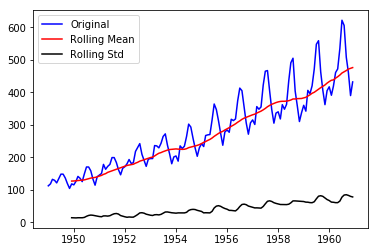

In [20]:
stationary_test(data)

In [21]:
r_mean=data.rolling(12).mean()
data1=data-r_mean
data1=data1.dropna()

The Test Statistics P value is 0.022104139473878785
The Signal is stationary


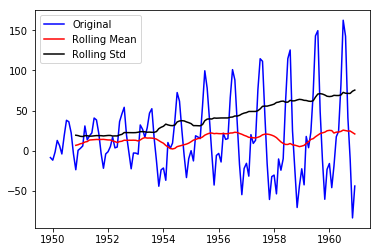

In [22]:
stationary_test(data1)

The Test Statistics P value is 0.022234630001244236
The Signal is stationary


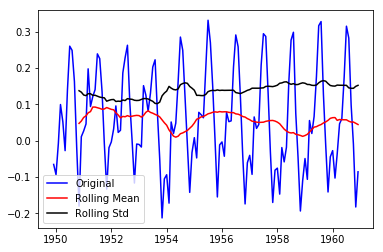

In [23]:
data_log=np.log(data)
r_mean=data_log.rolling(12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

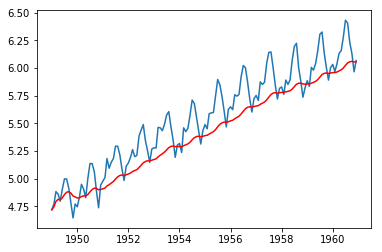

In [24]:
expwighted_avg= data_log.ewm(halflife=12).mean()
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

The Test Statistics P value is 0.0057369388015119215
The Signal is stationary


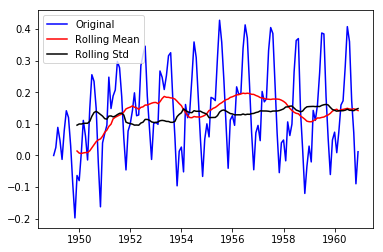

In [25]:
r_mean=data_log.ewm(halflife=12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

In [26]:

data_diff=data.diff(2)

The Test Statistics P value is 0.03862975767698741
The Signal is stationary


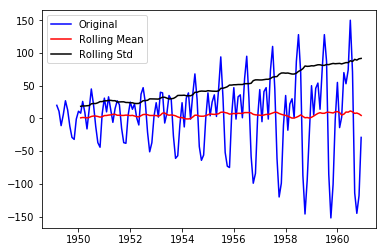

In [27]:
stationary_test(data_diff.dropna())

The Test Statistics P value is 7.419304549380349e-13
The Signal is stationary


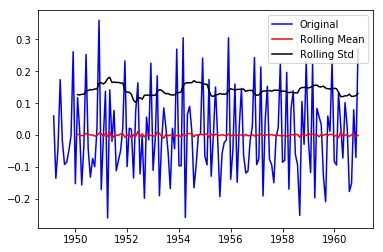

In [28]:
data_diff=data_log.diff().diff()
stationary_test(data_diff.dropna())

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

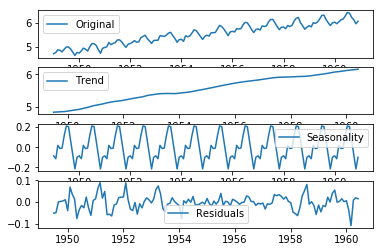

In [30]:
plt.subplot(4,1,1)
plt.plot(data_log, label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

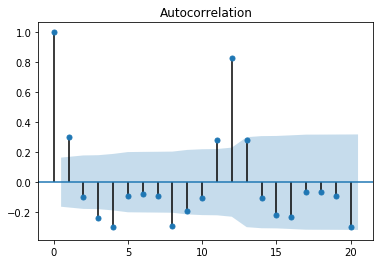

In [33]:
plot_acf(data.diff().dropna(),lags=20);

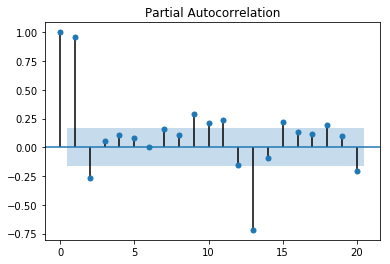

In [34]:
plot_pacf(data.dropna(),lags=20);

In [35]:
from pmdarima.arima.utils import ndiffs
ndiffs(data,test='adf') #adf,kpss,pp

0

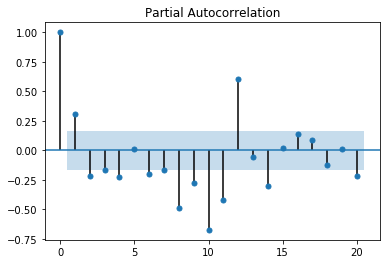

In [36]:
plot_pacf(data.diff().dropna(),lags=20);

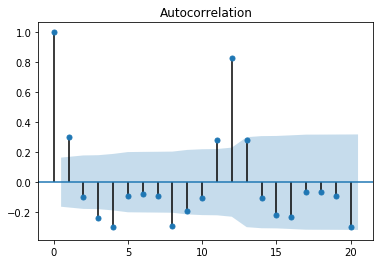

In [37]:
plot_acf(data.diff().dropna(),lags=20);

In [38]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(3, 0, 3))  
results_ARIMA = model.fit() 

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


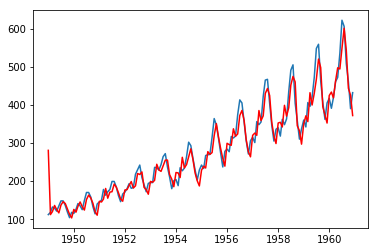

In [39]:
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='red')

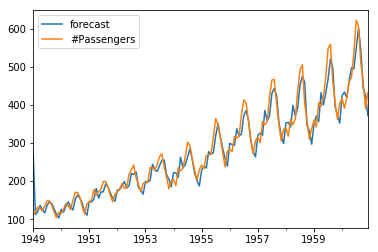

In [40]:
# Actual vs Fitted
results_ARIMA.plot_predict()
plt.show()

In [41]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(3, 3)   Log Likelihood                -679.759
Method:                       css-mle   S.D. of innovations             25.492
Date:                Mon, 24 Feb 2020   AIC                           1375.518
Time:                        14:25:36   BIC                           1399.277
Sample:                    01-01-1949   HQIC                          1385.173
                         - 12-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               280.5908        nan        nan        nan         nan         nan
ar.L1.#Passengers     2.6056   9.15e-05   2.85e+04      0.000       2.605       2.606
ar.L2.#Passengers    -2.

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [42]:
!pip install statsmodels

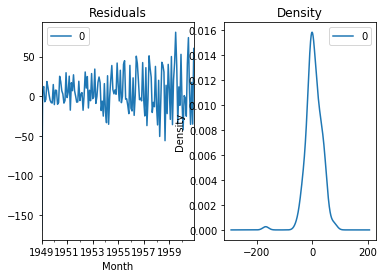

In [43]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [44]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [45]:


# Create Training and Test
train = data['#Passengers'][:130]
test = data['#Passengers'][130:]

In [46]:
# Forecast
fc, se, conf = results_ARIMA.forecast(14, alpha=0.05)  # 95% conf

In [47]:
fc

array([450.11834468, 462.52636165, 482.85953694, 504.97066218,
       523.20762886, 533.71488005, 535.10096109, 528.40532723,
       516.47827635, 503.01357918, 491.52177488, 484.50307498,
       482.9911258 , 486.52273004])

In [48]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

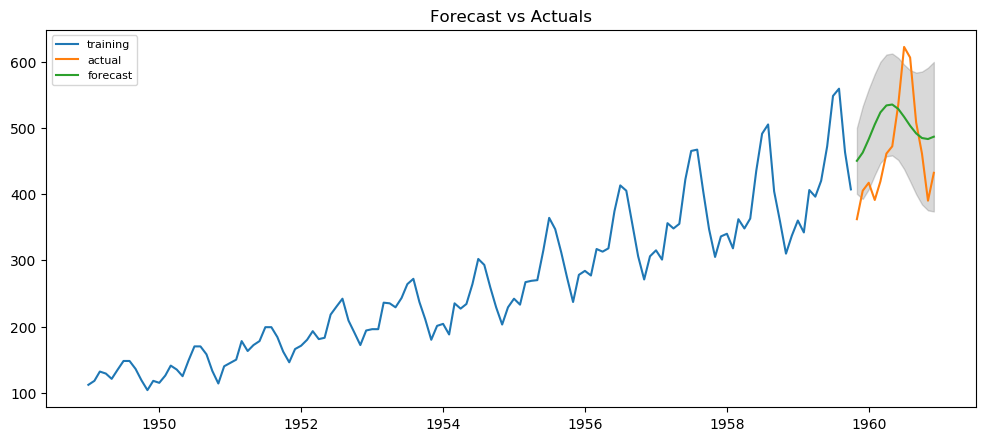

In [49]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [50]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

forecast_accuracy(fc, test.values)

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.15535707386541864,
 'me': 36.066733137794834,
 'mae': 69.14973918900311,
 'mpe': 0.10044884466772581,
 'rmse': 76.88482161811153,
 'acf1': 0.7088102827863085,
 'corr': 0.48894037061930623}

In [51]:
# metrics
from statsmodels.tsa.stattools import acf
mape = np.mean(np.abs(fc - test)/np.abs(test))  # MAPE
me = np.mean(fc - test)             # ME
mae = np.mean(np.abs(fc - test))    # MAE
mpe = np.mean((fc - test)/test)   # MPE
rmse = np.mean((fc - test)**2)**.5  # RMSE
corr = np.corrcoef(fc, test)[0,1]   # corr
acf1 = acf(fc-test)[1]              # ACF1


In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
import pmdarima as pm

In [54]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [55]:
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1409.748, BIC=1421.628, Fit time=0.102 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=1790.368, BIC=1796.307, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=1428.179, BIC=1437.089, Fit time=0.044 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1621.713, BIC=1630.623, Fit time=0.049 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=2057.847, BIC=2060.817, Fit time=0.005 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1408.249, BIC=1423.098, Fit time=0.143 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=1413.639, BIC=1425.518, Fit time=0.073 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1408.287, BIC=1426.106, Fit time=

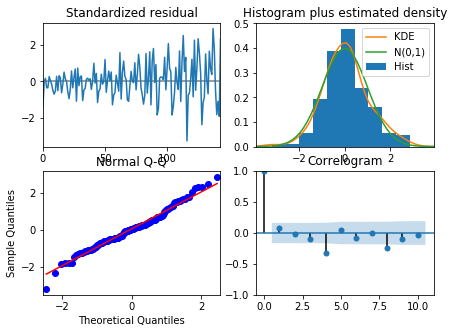

In [56]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [57]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.429 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.318 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.418 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1031.508, BIC=1034.383, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.121 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=1.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.165, BIC=1034.416, Fit time=3.973 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of t

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.920
Date:                            Mon, 24 Feb 2020   AIC                           1015.841
Time:                                    14:26:03   BIC                           1033.092
Sample:                                         0   HQIC                          1022.851
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.032      0.010      0.992      -0.063       0.064
ma.L1         -0.4253      0.068     -6.229      0.000      -0.559      -0.291
ar.S.L12       0.6670      0.160      4.163      0.000       0.353       0.981
ar.S.L24       0.3315      0.095      3.475      0.001       0.145       0.518
ma.S.L12      -0.9746      1.247     -0.781      0.435      -3.420       1.470
sigma2       110.6448    115.074      0.962      0.336    -114.897     336.186
===================================================================================
Ljung-Box (Q):                       53.03   Jarque-Bera (JB):                 7.47
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

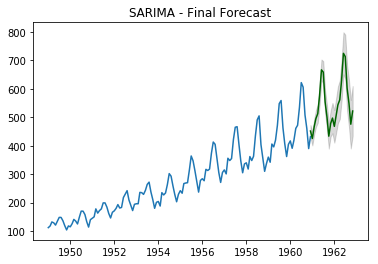

In [58]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods,freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()